In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arquivo =  pd.read_csv('ex1.csv',header=None,names=['x','y'])

0.8031542697704028
0.009722641160829106


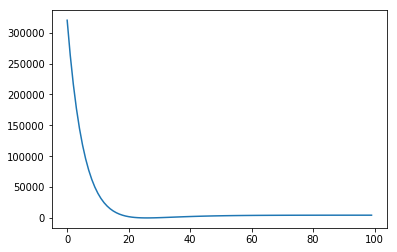

In [5]:
#Univariada  Gradiente Descendente
alfa = 0.001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1

mse = []
for epoch in range (100):
    y_pred = passo(N,arquivo,w0,w1)
    e = calc_error(y_pred,N,arquivo)
    ex = calc_errorx(y_pred,N,arquivo)
    w0 = w0 + (alfa * e)/N
    w1 = w1 + (alfa * ex)/N 
    mse.append(np.mean(e**2))
print(w1)
print(w0)
plt.plot(mse)

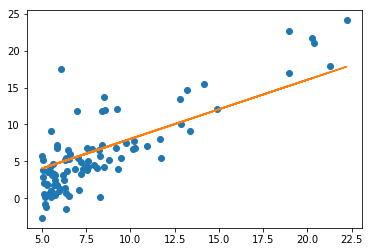

In [20]:
plt.plot(arquivo.values[:,0], arquivo.values[:,1], 'o')
plt.plot(arquivo.values[:,0], passo(N+1,arquivo,w0,w1))

In [4]:
def calc_error(y_pred,N,arquivo):
    e = 0
    for i in range (N):
        yi = arquivo.iat[i,1]
        e = e + yi - y_pred[i]
    return e

def calc_errorx(y_pred,N,arquivo):
    e = 0
    for i in range (N):
        yi = arquivo.iat[i,1]
        xi = arquivo.iat[i,0]
        e = e + (yi - y_pred[i])*xi
    return e

def passo(N,arquivo,w0,w1):
    y_pred = []
    for i in range (N):
        xi= arquivo.iat[i,0]
        ŷ = w0+w1*xi
        y_pred.append(ŷ)
    return y_pred

In [6]:
#Gradiente Estocástico 
def calc_errorw1(y_pred,N,arquivo,i):
    e = 0
    yi = arquivo.iat[i,1]
    xi = arquivo.iat[i,0]
    e = (yi - y_pred[i])*xi
    return e
def calc_errorw0(y_pred,N,arquivo,i):
    e = 0
    yi = arquivo.iat[i,1]
    e = yi - y_pred[i]
    return e
alfa = 0.0001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1
for epoch in range (10):
    y_pred = passo(N,arquivo,w0,w1)
    for i in range (N):     
        e = calc_errorw0(y_pred,N,arquivo,i)
        ex = calc_errorw1(y_pred,N,arquivo,i)
        w0 = w0 + (alfa * e)
        w1 = w1 + (alfa * ex)
print(w0)
print(w1)

0.012461220251567264
0.8030223106636478


In [32]:
arquivo


,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [22]:
#Lendo Dados como Matriz
data_table = pd.read_csv('ex1.csv', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

In [34]:
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

In [24]:
y.shape

(97,)

In [48]:
len(y)

97

In [21]:
y.shape

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [39]:
#Regressao Polinomial 
P =2
alfa = 0.00001
            
if P > 1:
    x_matrix = criar_regressores(x,P)
else :
    x_matrix = x
vetorW = np.zeros(x_matrix.shape[0])
vetorW = vetorW.reshape(97,1)
for epocas in range(100):
    erro = y - x_matrix.dot(vetorW.transpose)
    #vetorW += alfa * np.mean(error[:, None] * x_matrix, axis=0)  

TypeError: unsupported operand type(s) for *: 'float' and 'builtin_function_or_method'

In [13]:
def criar_regressores(x,P):
    regressors = np.hstack((np.ones((x.shape[0], 1)), x))
    
    if P > 1:
        for i in range(2,P+1):        
            regressors = np.hstack((regressors, x**i))        
    return regressors
    

In [19]:
#Regressão Logística 
Gradiente Descendente
alfa = 0.0001
w0 = 0
w1 = 0
N = arquivo.shape[0]-1

for epoch in range (100):
    y_pred = passo(N,arquivo,w0,w1)
    e = calc_error(y_pred,N,arquivo)
    ex = calc_errorx(y_pred,N,arquivo)
    w0 = w0 + (alfa * e)/N
    w1 = w1 + (alfa * ex)/N 
print(w1)
print(w0)

0.4501480444823226
0.037951902486765214


In [27]:
def calc_logistica(y):
    return 1/ 1+ np.exp(-y)
    

In [28]:
def cal_error_logi():
    

1.0000453999297625